In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
titanic_df = pd.read_csv('titanic.csv')

In [11]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [32]:
def check_nulls(columns, df):
    for col in columns:
        print('the unique vals of {}'.format(col))
        print(df['{}'.format(col)].unique())
        #print(df['{}'.format(col)].isnull().sum())
    return

In [33]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


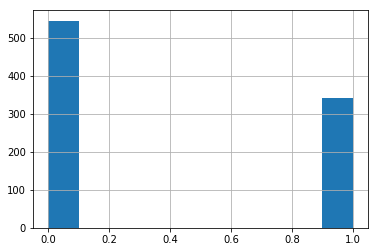

In [60]:
titanic_df.Survived.hist()

# Clean up data

In [48]:
titanic_df['Pclass'] = titanic_df['Pclass'].astype(str)

In [49]:
numerical_cols = titanic_df.select_dtypes(include=['number']).columns.values

In [50]:
numerical_cols

array(['Survived', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'], dtype=object)

In [51]:
catagorical_cols = titanic_df.select_dtypes(exclude=['number']).columns.values

In [52]:
catagorical_cols

array(['Pclass', 'Name', 'Sex'], dtype=object)

In [58]:
# remove name column
titanic_full_dummies= pd.get_dummies(titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare']])

In [99]:
titanic_full_dummies.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,0.271174,0.125,0.0,0.014151,0,0,1,0,1
1,1.0,0.472229,0.125,0.0,0.139136,1,0,0,1,0
2,1.0,0.321438,0.000,0.0,0.015469,0,0,1,1,0
3,1.0,0.434531,0.125,0.0,0.103644,1,0,0,1,0
4,0.0,0.434531,0.000,0.0,0.015713,0,0,1,0,1


# Normalize variables

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [65]:
numerical_cols = titanic_df.select_dtypes(include=['number']).columns.values

In [66]:
titanic_full_dummies[numerical_cols] = scaler.fit_transform(titanic_full_dummies[numerical_cols])

In [67]:
titanic_full_dummies.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,0.271174,0.125,0.0,0.014151,0,0,1,0,1
1,1.0,0.472229,0.125,0.0,0.139136,1,0,0,1,0
2,1.0,0.321438,0.000,0.0,0.015469,0,0,1,1,0
3,1.0,0.434531,0.125,0.0,0.103644,1,0,0,1,0
4,0.0,0.434531,0.000,0.0,0.015713,0,0,1,0,1


# Select data

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
y = titanic_full_dummies.iloc[:, 0].values

In [71]:
X = titanic_full_dummies.iloc[:, 1:].values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a model

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
tree = DecisionTreeClassifier(random_state=0)

In [77]:
tree = tree.fit(X_train, y_train)

In [78]:
tree_precisions_train = tree.predict(X_train)

In [79]:
tree_precisions_test = tree.predict(X_test)

In [81]:
from sklearn import metrics

In [82]:
tree_train_roc_auc = metrics.roc_auc_score(y_train, tree_precisions_train)

In [84]:
tree_train_roc_auc

0.9746835443037974

In [83]:
tree_test_roc_auc =  metrics.roc_auc_score(y_test, tree_precisions_test)

In [85]:
tree_test_roc_auc

0.7709876543209877

# Train multiple models

In [94]:
from sklearn.metrics import roc_auc_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    Parameters
    ----------
    learner: the learning algorithm to be trained and predicted on
    sample_size: the number of sample to be drawn from the training set
    X_train: features traing set
    y_train: income training set
    X_test: feature test set
    y_test: income test set
    '''
    
    results = {}
    
    # Fit learner to the training data using slicing with "samlple size"
    start = time()
    learner = learner.fit(X_train[:sample_size],
                         y_train[:sample_size])
    end = time()
    
    # Calculate the training time
    results['training_time'] = end - start
    
    # Get predictions on the test set
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:sample_size])
    end = time()
    
    # Calculate the prediction time
    results['pred_time'] = end - start
    
    # Compute the accuracy on the test set
    results['acc_train'] = accuracy_score(y_train[:sample_size], predictions_train)
    
    # Compute the accuracy on the test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute AUC on the first sample_size training samples
    results['auc_train'] = roc_auc_score(y_train[:sample_size], predictions_train)
    
    # Compute AUC on the test set
    results['auc_train'] = roc_auc_score(y_test, predictions_test)
    
    # Success
    print("{} trained on {} samples".format(learner.__class__.__name__, sample_size))
    
    # Return the results
    return results

In [95]:
# Import models from sklean
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from time import time

In [96]:
# Initialize the models
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = GradientBoostingClassifier(random_state=0)
clf_C = LogisticRegression()

In [97]:
# Calculate the number of samples for 50%, 80% and 100% of the training data
samples_100 = len(y_train)
samples_80 = int(samples_100 * 0.8)
samples_50 = int(samples_100 * 0.5)

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_50, samples_80, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 310 samples
DecisionTreeClassifier trained on 496 samples
DecisionTreeClassifier trained on 620 samples
GradientBoostingClassifier trained on 310 samples
GradientBoostingClassifier trained on 496 samples
GradientBoostingClassifier trained on 620 samples
LogisticRegression trained on 310 samples
LogisticRegression trained on 496 samples
LogisticRegression trained on 620 samples


In [98]:
results

{'DecisionTreeClassifier': {0: {'acc_test': 0.700374531835206,
   'acc_train': 0.9774193548387097,
   'auc_train': 0.6760141093474427,
   'pred_time': 0.0,
   'training_time': 0.0020067691802978516},
  1: {'acc_test': 0.7715355805243446,
   'acc_train': 0.9818548387096774,
   'auc_train': 0.7547619047619049,
   'pred_time': 0.0,
   'training_time': 0.002005338668823242},
  2: {'acc_test': 0.7790262172284644,
   'acc_train': 0.9806451612903225,
   'auc_train': 0.7709876543209877,
   'pred_time': 0.0,
   'training_time': 0.0020055770874023438}},
 'GradientBoostingClassifier': {0: {'acc_test': 0.7790262172284644,
   'acc_train': 0.9354838709677419,
   'auc_train': 0.7626102292768958,
   'pred_time': 0.0010039806365966797,
   'training_time': 0.05112957954406738},
  1: {'acc_test': 0.8314606741573034,
   'acc_train': 0.9193548387096774,
   'auc_train': 0.8158730158730159,
   'pred_time': 0.0,
   'training_time': 0.03876233100891113},
  2: {'acc_test': 0.8239700374531835,
   'acc_train': 0.